Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução a Teoria das Vibraços 

## TRABALHO 2.2

#### Aluno= Adriano Rodrigues da Silva (00312130)

#### Professor Dr. Marcelo Maia Rocha


In [2]:
# Inicalmente realizamos a importação dos módulos de Phyton

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc

import pickle as pk

## 1. Frequências naturais e modos de vibração

A partir da estrutura elaborana e apresentada no Trabalho 2.1 obtemos as matrizes de flexibilidade, rigidez e criamos a matriz de massa. Estas são apresentadas na sequencia.


In [3]:
# Matriz de flexibilidade  m/N
H1 = np.array([[4.350, 6.190, 7.380, 8.020, 8.130, 7.840, 7.150, 6.080, 4.820, 3.270, 1.710], 
               [6.190, 11.37, 13.92, 15.27, 15.61, 15.10, 13.73, 11.84, 9.310, 6.470, 3.270], 
               [7.380, 13.92, 19.26, 21.50, 22.18, 21.60, 19.84, 17.06, 13.50, 9.310, 4.820], 
               [8.020, 15.27, 21.50, 26.17, 27.40, 26.93, 24.92, 21.50, 17.06, 11.84, 6.080], 
               [8.130, 15.61, 22.18, 27.40, 30.82, 30.71, 28.67, 24.92, 19.84, 13.73, 7.150], 
               [7.840, 15.10, 21.60, 26.93, 30.71, 32.74, 30.71, 26.93, 21.60, 15.10, 7.840], 
               [7.150, 13.73, 19.84, 24.92, 28.67, 30.71, 30.83, 27.40, 22.18, 15.61, 8.130], 
               [6.080, 11.84, 17.06, 21.50, 24.92, 26.93, 27.40, 26.17, 21.50, 15.27, 8.020], 
               [4.820, 9.310, 13.50, 17.06, 19.84, 21.60, 22.18, 21.50, 19.26, 13.92, 7.380], 
               [3.270, 6.470, 9.310, 11.84, 13.73, 15.10, 15.61, 15.27, 13.92, 11.37, 6.190],
               [1.710, 3.270, 4.820, 6.080, 7.150, 7.840, 8.130, 8.020, 7.380, 6.190, 4.350]])*1e-8


In [4]:
# Obtendo os coficientes de rigidez N/m
K1 = np.linalg.inv(H1) 


In [5]:
# Matriz de massa kg
M1 = np.array([[3.82, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
               [0, 3.82, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
               [0, 0, 3.82, 0, 0, 0, 0, 0, 0, 0, 0], 
               [0, 0, 0, 3.82, 0, 0, 0, 0, 0, 0, 0], 
               [0, 0, 0, 0, 3.82, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 3.82, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 3.82, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 3.82, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 3.82, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 3.82, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.82]])*1e3 


Fazendo uso da biblioteca scipy, determinamos as frequencias natuais e modos de vibração a partir da resolução de autovalores e autovetores. Na sequência, apresentamos os 04 primeiros modos de vibração e suas frequências naturais. 


In [6]:
# Uso das funções eig do módulo linalg para obtenção dos autovalores e autovetores
w21, Phi1 = sc.eig(K1, M1)

# Ordendando
iw = w21.argsort()
w21 = w21[iw]
Phi1 = Phi1[:,iw]

# Cálculo das frequências naturais
wk1 = np.sqrt(np.real(w21))
fk1 = wk1/2/np.pi

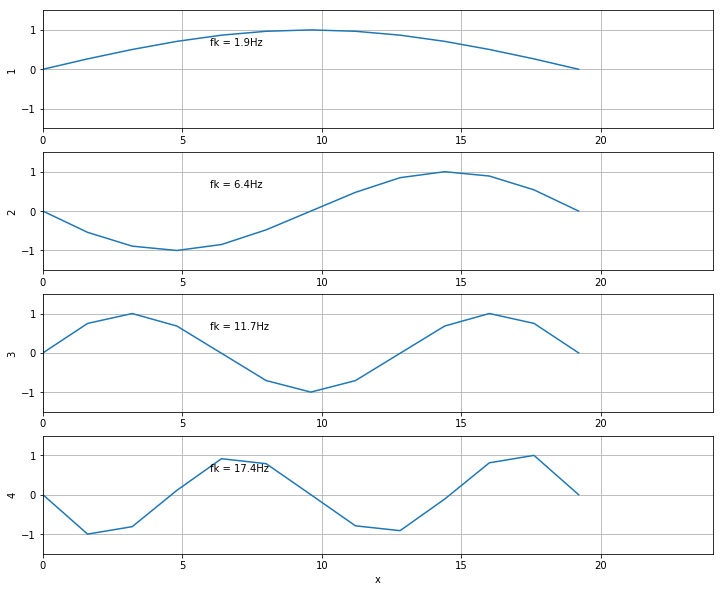

In [7]:
plt.figure(1, figsize=(12,10))
x = np.arange(0, 20.8 , 1.6)

for k in range(4):
    pk = np.zeros(13)
    pk[1:-1] = Phi1[:,k]
    pk /= np.max(np.abs(pk))  #ajustando a escala
    
    plt.subplot(4,1,k+1)
    plt.plot(x, pk)
    
    plt.xlim(0.0, 24.0)
    plt.ylim(-1.5, 1.5); plt.ylabel(str(k+1));
    plt.text(6, 0.6,'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');


# 2. Resposta da estrutura a um impacto

Vamos condiderar a aplicação de uma força de 30.000 N sobre a estrutura, durante um intervalo muito curto, para que definimos como uma força impulsiva onde td= Tn/4. Tn é o menor periodo relacionado a frequencias natuais de vibração. Podemos á partir destas informações, montar o vetor de velocidade: 

Após obter o vetor de velocidades, calculamos os angulos de fase e amplitudes para os nós. O angulo será  - pi/2, devido  o deslocamento inicial ser nulo.

In [8]:
fmax = np.max(fk1)
print(fmax)
Fa = 60000
Tn = 1/fmax
td = Tn/4
m = 3820            
vo = Fa*td/m
print(vo)

vo_v=[0, 0, 0, 0, vo, 0, 0, 0, 0, 0, 0]

uo_v = np.zeros(11)

44.935202332583295
0.08738586602142234


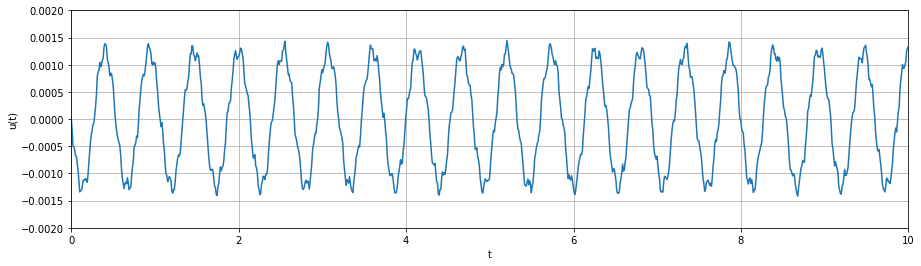

In [9]:
Phit=Phi1  #definição

for k in range(10):
    
    Phit[k] = Phi1[k].transpose() #calculo do transposto dos autovalores
    
xi = np.pi/2
UMAX = np.zeros(11)

for k in range (11):
    Mi=np.dot(np.dot(Phit[k], M1), Phi1[k])
    umax = (np.dot(np.dot(Phit[k], M1), vo_v)) / (wk1[k] * np.sin(xi)* Mi) #calculo do deslocamento umax
    
    UMAX[k]= umax
    

t =np.linspace(0,10,1000)  #vetor de representação do tempo
uk = np.zeros((11,1000))   #criação da matriz para os valores de deslocamentos


for k in range(11):
    
    uk[k, :] = UMAX[k]*np.cos(-wk1[k]*t - np.pi/2)
    
u = np.dot(Phi1, uk)      #produto da matriz de deslocamentos pelos autovalores

plt.figure(2, figsize=(15,4))
plt.plot(t,u[5, :])       #plotando a curva do maior deslocamento - centro do vão
plt.xlim( 0.0, 10.0); plt.xlabel("t");
plt.ylim(-0.002,0.002); plt.ylabel("u(t)");
plt.grid(True)



## 3. Amortecimento

A Matriz de amortecimento de Rayleigh (C) é uma combinação linear das matrizes de rigidex (K) e da matriz de massa (M). Para monta-la, foi atribuido um amortecimentyo de 1% (usual para casos de engenharia civil) para os primeiros modos de vibração. Como é conhecida as frequências naturais destes modos, calculamos os alfas 0 e 1. No final, determonou-se o amortecimento para todos os nós da estrutura. 

In [11]:
#a matriz de amortecimento é uma combinação linear das matirzes de rigidez e massa.

zeta =np.zeros(11)
zeta[0] = 0.01
zeta[1] = 0.01
alfa1 = 2*(zeta[0]* wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0 = 2*zeta[0]* wk1[0]-alfa1*wk1[1]**2

for k in range (9):
    zeta[k+2] = (alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)
    
print(zeta)

[0.01       0.01       0.01143604 0.01927415 0.02492744 0.03174762
 0.03491401 0.0391886  0.04279612 0.04614543 0.05353104]
